In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [4]:
boston_data=pd.DataFrame(boston.data)

In [5]:
print(boston_data.head())

         0     1     2    3      4      5     6       7    8      9    10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [7]:
boston_data.columns=boston.feature_names

In [8]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
boston_data['Price']=boston.target

In [10]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [65]:
target=np.array(boston_data['Price'])
data=np.array(boston_data['LSTAT'])
target_train,target_test,data_train,data_test=train_test_split(target,data,test_size=0.33, random_state=42)

In [70]:
np.size(data_train)

339

In [75]:
a_0=np.zeros(339,dtype=float)

In [79]:
a_1=np.zeros(339,dtype=float)

In [55]:
#y=a_0+a_1*x

In [80]:
epoch=0
n=339
lr=0.001

In [82]:
while(epoch<100000):
    pred=a_0+a_1*target_train
    error=pred-data_train
    mean_sqr=np.sum((error**2))/n
    a_0=a_0-lr*2*np.sum(error)/n
    a_1=a_1-lr*2*np.sum(error*target_train)/n
    epoch+=1
    if(epoch%5000==0):
        print(mean_sqr)

27.948191747741625
22.88810332414195
22.598080870928754
22.581458034265367
22.580505284932766
22.580450677448546
22.580447547582978
22.58044736819258
22.580447357910696
22.580447357321383
22.580447357287607
22.580447357285667
22.580447357285557
22.580447357285554
22.580447357285546
22.58044735728555
22.580447357285546
22.580447357285546
22.580447357285546
22.58044735728555


R2 Score: 0.5072040267293736


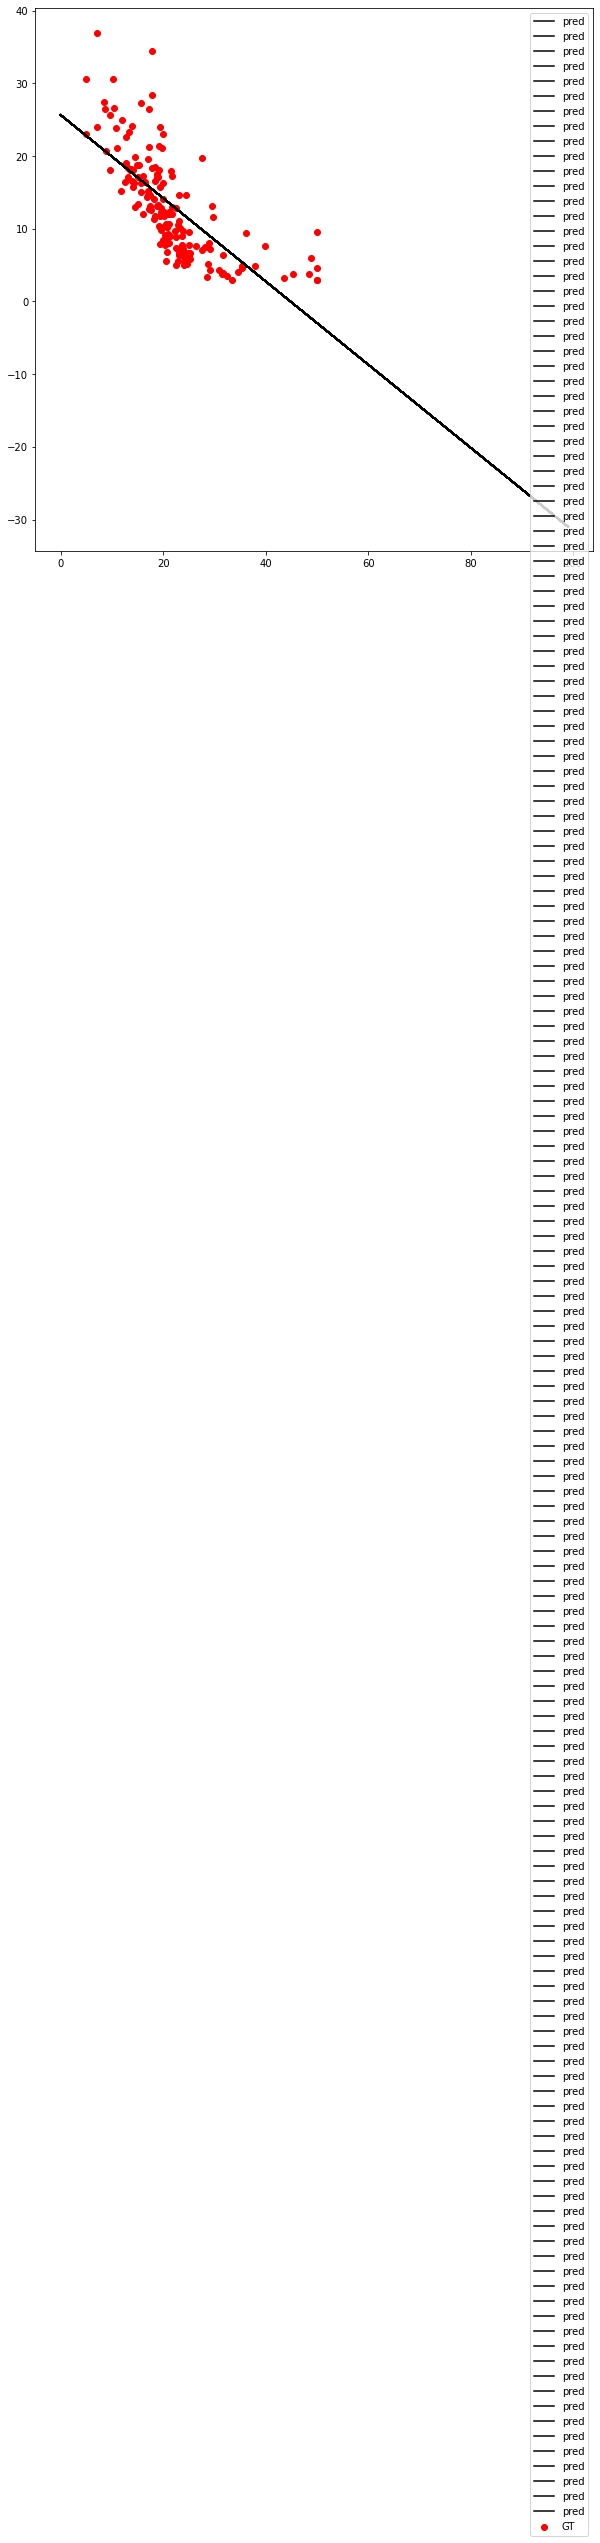

In [89]:
from sklearn.metrics import r2_score
a_0=a_0[0:167]
a_1=a_1[0:167]
y_prediction = a_0 + a_1 * target_test
print('R2 Score:',r2_score(data_test,y_prediction))

y_plot = []
for i in range(100):
    y_plot.append(a_0 + a_1 * i)
plt.figure(figsize=(10,10))
plt.scatter(target_test,data_test,color='red',label='GT')
plt.plot(range(len(y_plot)),y_plot,color='black',label = 'pred')
plt.legend()
plt.show()